<h2><b>📘 "Which Spending Drives Profit? — A Multiple Linear Regression Study"</b></h2>


<h2><b>Section 1: Introduction</b></h2>

<b>In this notebook, we explore how different types of business expenditures—Digital Marketing, Promotion, and Research—impact a company's 
profit. We'll use multiple linear regression to quantify influence, and apply feature selection to identify statistically significant 
investments.


In [88]:
# 📦 Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

<h2><b>Section 2: Data Overview & EDA</b></h2>


<h2><b>Understand the variables, check correlations, and visualize relationships.</b></h2>

In [90]:
# 📂 Load Dataset
dataset = pd.read_csv('/home/hp/Downloads/datasets/Investment.csv')

#<h2><b> 📊 EDA </b></h2>

In [91]:
print(dataset.head())

   DigitalMarketing  Promotion   Research      State     Profit
0         165349.20  136897.80  471784.10  Hyderabad  192261.83
1         162597.70  151377.59  443898.53  Bangalore  191792.06
2         153441.51  101145.55  407934.54    Chennai  191050.39
3         144372.41  118671.85  383199.62  Hyderabad  182901.99
4         142107.34   91391.77  366168.42    Chennai  166187.94


In [92]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DigitalMarketing  50 non-null     float64
 1   Promotion         50 non-null     float64
 2   Research          50 non-null     float64
 3   State             50 non-null     object 
 4   Profit            50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [93]:
print(dataset.describe())

       DigitalMarketing      Promotion       Research         Profit
count         50.000000      50.000000      50.000000      50.000000
mean       73721.615600  121344.639600  211025.097800  112012.639200
std        45902.256482   28017.802755  122290.310726   40306.180338
min            0.000000   51283.140000       0.000000   14681.400000
25%        39936.370000  103730.875000  129300.132500   90138.902500
50%        73051.080000  122699.795000  212716.240000  107978.190000
75%       101602.800000  144842.180000  299469.085000  139765.977500
max       165349.200000  182645.560000  471784.100000  192261.830000


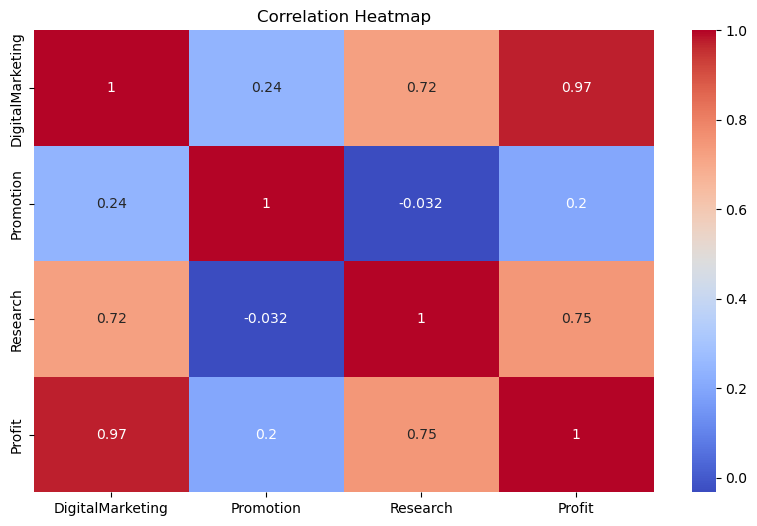

In [94]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<h2><b>Section 3: Data Preprocessing</b></h2>

<h2><b>Encode categorical variables and split the dataset.</b></h2>

In [95]:
X= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [96]:
print(X.head())

   DigitalMarketing  Promotion   Research      State
0         165349.20  136897.80  471784.10  Hyderabad
1         162597.70  151377.59  443898.53  Bangalore
2         153441.51  101145.55  407934.54    Chennai
3         144372.41  118671.85  383199.62  Hyderabad
4         142107.34   91391.77  366168.42    Chennai


In [97]:
print(y.head())

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [98]:
X = pd.get_dummies(X,dtype=int)
X.head(8)

,DigitalMarketing,Promotion,Research,State_Bangalore,State_Chennai,State_Hyderabad
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0


<h3><b># 🔀 Train/Test Split</b></h3>

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h2><b>Section 4: Model Training & Evaluation</b></h2>


<h3><b>Fit a regression model and evaluate it using R², MAE, MSE.</b></h3>

In [100]:
# 🤖 Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# 🔮 Prediction & Evaluation
y_pred = model.predict(X_test)

In [102]:
print("\n📈 Evaluation Metrics")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


📈 Evaluation Metrics
R² Score: 0.9347068473282424
MAE: 7514.293659640605
MSE: 83502864.03257754


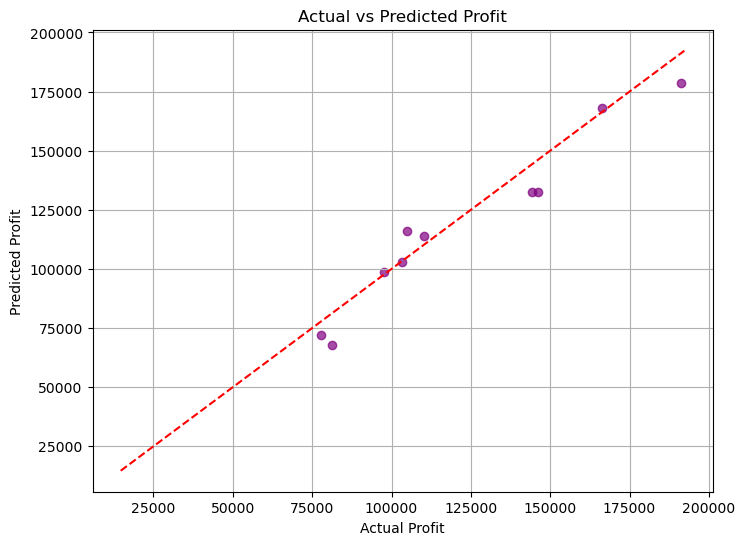

In [103]:
# 📉 Actual vs Predicted Plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.grid(True)
plt.show()

<h2><b>Section 5: Inference with OLS (Statsmodels)</b></h2>


In [79]:
# 🧠 Backward Elimination using statsmodels
X_opt = np.append(arr=np.ones((X.shape[0],1)).astype(int), values=X.values, axis=1)

<h2><b>Use backward elimination to find the most important predictors.</b></h2>

In [80]:
def backward_elimination(X, y, sl=0.05):
    numVars = X.shape[1]
    for i in range(numVars):
        regressor_OLS = sm.OLS(y, X).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > sl:
            for j in range(X.shape[1]):
                if regressor_OLS.pvalues[j] == max_p_value:
                    X = np.delete(X, j, 1)
                    break
    regressor_OLS = sm.OLS(y, X).fit()
    print("\n📜 Final OLS Summary:")
    print(regressor_OLS.summary())
    return X

X_modeled = backward_elimination(X_opt, y)


📜 Final OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Tue, 20 May 2025   Prob (F-statistic):           2.76e-29
Time:                        20:00:37   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.686e+04   1959.7

/tmp/ipykernel_274497/2327931158.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if regressor_OLS.pvalues[j] == max_p_value:
/tmp/ipykernel_274497/2327931158.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if regressor_OLS.pvalues[j] == max_p_value:


<h2><b>Section 6: Conclusion</b></h2>

<h2><b>Explain which investments lead to higher profit and why some may be redundant.</b></h2>


/tmp/ipykernel_274497/3037310412.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/home/hp/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


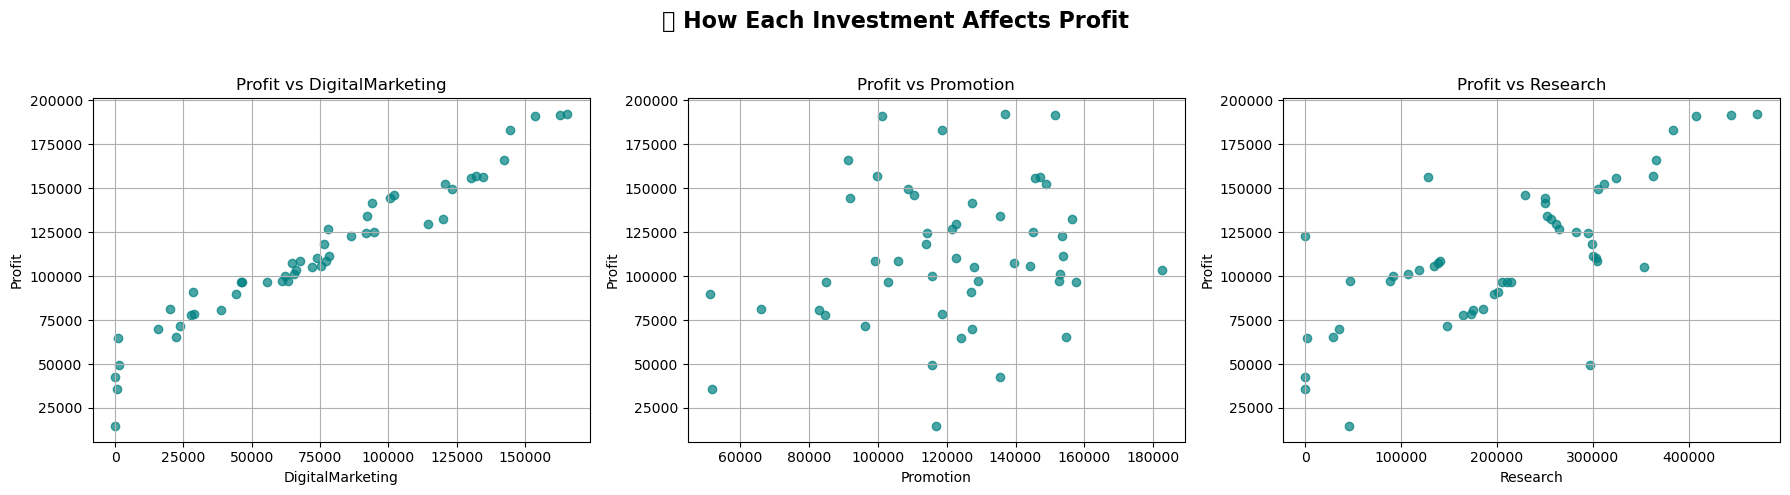

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['DigitalMarketing', 'Promotion', 'Research']

for i, feature in enumerate(features):
    axes[i].scatter(dataset[feature], dataset['Profit'], alpha=0.7, color='teal')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Profit")
    axes[i].set_title(f"Profit vs {feature}")
    axes[i].grid(True)

plt.suptitle("🔍 How Each Investment Affects Profit", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_274497/945816354.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_features, y=selected_coeffs, palette="viridis")
/tmp/ipykernel_274497/945816354.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/hp/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


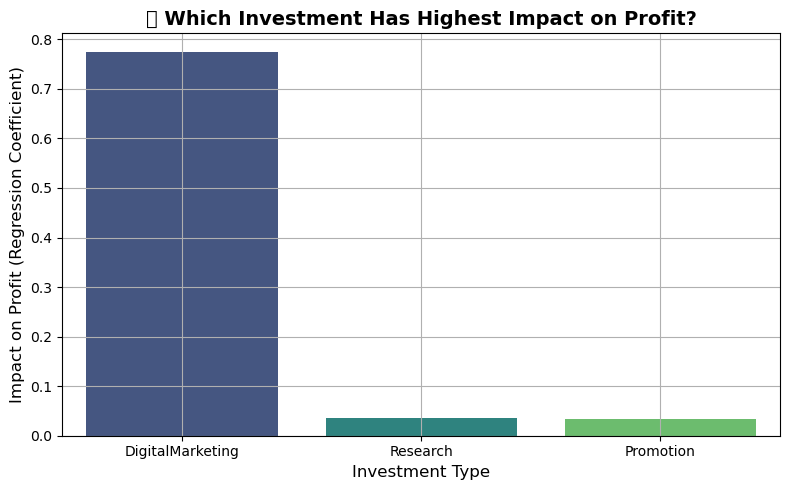

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Final selected features and their coefficients
final_features = ['DigitalMarketing', 'Research','Promotion']  # Example based on your final model
final_coeffs = model.coef_  # From sklearn LinearRegression

# Get index of selected features in same order
selected_indexes = [X.columns.get_loc(f) for f in final_features]
selected_coeffs = [final_coeffs[i] for i in selected_indexes]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=final_features, y=selected_coeffs, palette="viridis")
plt.title("📊 Which Investment Has Highest Impact on Profit?", fontsize=14, fontweight='bold')
plt.xlabel("Investment Type", fontsize=12)
plt.ylabel("Impact on Profit (Regression Coefficient)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


<h2><b>📊 Visual Insight</b></h2>

The plots above clearly show how different investments impact company profit:

- 📈 **Research** spending shows a strong positive linear relationship with Profit.
- 📉 **Promotion** has no strong trend — confirming the statistical insignificance from OLS.
- 🤝 **Digital Marketing** shows a moderate positive impact.

This reinforces our model's findings and gives stakeholders an easy-to-understand business takeaway.


<h2><b>📌 Final Business Insight</b></h2>

- The final model shows that **Digital Marketing** has the **strongest positive impact** on company profits.
- **Research** also contributes meaningfully, while **Promotion** was found statistically insignificant and removed.
- The chart below visualizes the impact of each spending type, helping business teams make **data-driven budget decisions**.

📊 **Conclusion:** Companies should prioritize **Digital Marketing** investment to maximize profit.
